# Logistic Regression

Despite the name, this model is a binary __classification model__ that will tell us the probability of a point belonging to a class rather than another.

## Theoretical aspects

### Odds ratio

In a binary classification problem, let $p$ be the probability of the positive class occurring. The _odds_ function $f(p)$ is defined as the ratio between the probability of the positive class and the probability of the negative class (which is reasonably $1 - p$):
$$
    f(p) = \frac{p}{1 - p}
$$

By plotting this function we see that when $p\to 1$, $f(p)\to \infty$ meanwhile, when $p\to 0$, $f(p)\to 0$

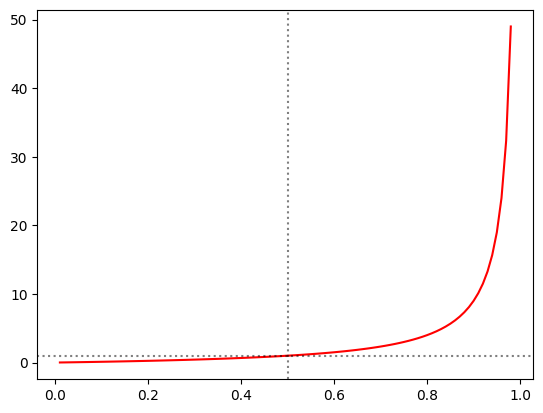

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# values of p
p = np.arange(0.01, 0.99, 0.01)

# function
odds_ratio = p / (1 - p)

# plot the odds
plt.plot(p, odds_ratio, color = "r")

# add axis
plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(1.0, color='k', alpha = 0.5, linestyle = ":")

### Logit function

We can now define the __logit__ function as $\ell(p) = \log(f(p))$, reason why it is also called _log-odds_ function:
$$
    \text{logit}(p) = \ell(p) = \log\left( \frac{p}{1 - p} \right)
$$

The _logit_ function is a monotonic transformation of the odds function $f$ as follows:
$$
    \ell(p)\,\, : \,\, \left[0, 1\right] \,\longrightarrow\, \mathopen]-\infty, +\infty\mathclose[
$$

The transformation maps the range $\left[0, 1\right]$ into the set of real numbers $\mathbb{R}$ as shown in the plot below


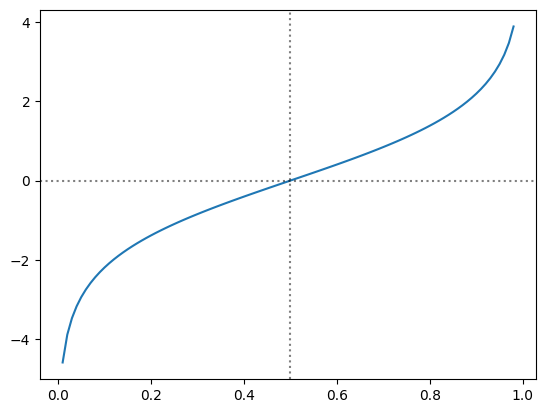

In [2]:
# plot the logit function
plt.plot(p, np.log(odds_ratio))

# add axis
plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.0, color='k', alpha = 0.5, linestyle = ":")

### Logistic $sigmoid$ function

We can now start to denote a vital function. If $p$ is the probability that a point $X_i$ in the dataset is classified in the positive class ($y = 1$) - which can be written as $p(y = 1 \,|\, X_i)$ - we can try to link this relationship with the _logit_ function as follows:
$$
\begin{align*}
\ell\left[p(y = 1 \,|\, X_i)\right] &= w_0X_i^0 + w_1X_i^1 + \dots + w_dX_i^d
\\
&= w^TX_i = z
\end{align*}
$$

In a real problem, we know the value of $z = w^TX_i$, so we need to inverse the relationship to get the value of $p$:
$$
\begin{align*}
z &= \log\left( \frac{p}{1 - p} \right) \\

e^z &= \frac{p}{1 - p} \\

(1 - p) e^z &= p \\

e^z - pe^z &= p \\

e^z &= p(1 + e^z) \\

p &= \frac{e^z}{1 + e^z} \\

\end{align*}
$$

We got the $p$ value that depends on $z$. This is a very important function, also called __sigmoid__ function $\sigma(z)$ and can be rewritten as follows:
$$
    \boxed{\sigma(z) = \frac{1}{1 + e^{-z}}}
$$

As we can see from the plots, in a monodimensional world, the sigmoid function is a probability distribution that indicates, based on the position of the monodimensional plane, what is the probability of a point being in a positive class. Reasonably, the more we go $\infty$, the more the probability decreases and vice versa.

Ideally, for a bi-dimensional plane, the function $\sigma$ would be a 3-dimensional wave that describes the distribution for the plane. For dimensions larger than two we cannot imagine the function but it does exist.


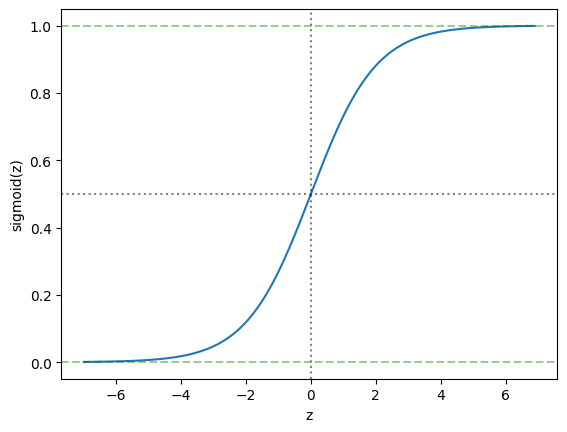

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

# plot sigmoid
plt.plot(z, sigma_z)

# axis
plt.axvline(0.0, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.5, color='k', alpha = 0.5, linestyle = ":")

# labels
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

plt.axhline(1.0, color='g', alpha = 0.4, linestyle = "--")
plt.axhline(0.0, color='g', alpha = 0.4, linestyle = "--")

### Cost function

For a linear regression classifier, we can now define its own _activation_ function $h$. In this case, instead of using a weigh vector $w$ we will use a vector called $\theta$:
$$
h_\theta(X_i) = \theta_0 X_i^0 + \theta_1 X_i^1 + \dots + \theta_d X_i^d = \theta^T X_i
$$

We can now define the __likelihood function__ as:
$$
\mathbb{L}(\theta) = h_\theta(X_i)^{y_i}[1 - h_\theta(X_i)]^{1 - y_i}
$$

To minimize the likelihood function we can take the logarithm of $\mathbb{L}(\theta)$ and maximize it:
$$
\begin{align*}
\ell(\theta) &= \log\left[ \mathbb{L}(\theta) \right] \\
&= y_i\log\left[h_\theta(X_i)\right] + (1 - y_i)\log\left[1 - h_\theta(X_i)\right]
\end{align*}
$$

Maximizing $\ell(\theta)$ is like minimizing $-\ell(\theta)$; we just defined the __cost function__:
$$
\begin{align*}
\mathbb{J}(\theta) &= -\ell(\theta) \\
&= - y_i\log\left[h_\theta(X_i)\right] - (1 - y_i)\log\left[1 - h_\theta(X_i)\right]
\end{align*}
$$

By using the same procedure used in the [gradient descent](../gradient-descent/GD-basic.ipynb) we can compute the following derivative
$$
\nabla\mathbb{J}(\theta) = \frac{1}{N}X^T\left[ h_\theta(X) - y \right]
$$

### Learning rule

We can now define the learning rule, which is the same one used for the gradient descend:
$$
\theta_\text{NEW} = \theta_\text{OLD} + \eta\nabla\mathbb{J}(\theta)
$$

By exploiting the gradient we get:
$$
\boxed{\theta_\text{NEW} = \theta_\text{OLD} + \frac{\eta}{N}X^T\left[ h_\theta(X) - y \right]}
$$


## Implementation

If we plug the sigmoid function $\sigma(z) = \sigma(w^TX_i)$ at the output of a _perceptron_, we can obtain the probability that the object $X_i$ in the datapoint belongs to the positive class. To do such a thing we can decide a _threshold_ probability $\overline{p}$ and when $\sigma(w^TX_i) > \overline{p}$ the classifier will label the point $X_i$ belonging to the positive class.

### Initial setup 

After setting the random seed, and making it deterministic for the dataset generation, we define the $X$ monodimensional matrix, creating the positive and negative class. After the generations of the points, we plotted the points to visualize their distribution.

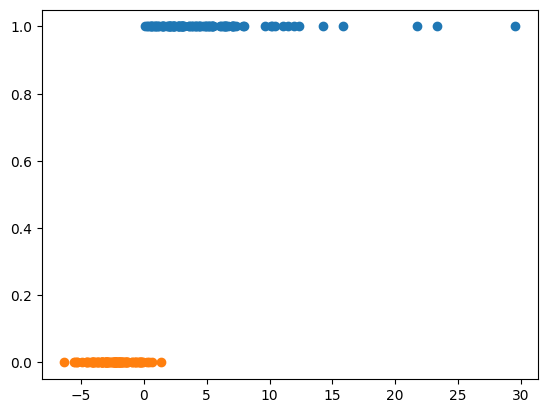

In [4]:
# set random seed
np.random.seed(123)

# generate N points per class
N = 100

# draw samples for X1 in a monodimensional plane
X1_1 = np.random.exponential(scale = 5.5, size = N) 

# we would have the points in the same axis, we are shifting them just to visualize them better
X2_1 = np.random.normal(loc = -2.5, scale = 1.5, size = N)

# set labels
y1 = np.ones(N)
y2 = np.zeros(N)

# plot the two classes
plt.scatter(X1_1, y1)
plt.scatter(X2_1, y2)

After plotting the classes we create the two matrixes that will be used for the training part

In [5]:
# dataset X
X = np.stack((np.ones(N * 2),
              np.concatenate((X1_1, X2_1))), 
              axis = 1)

# label vector
y = np.concatenate((y1, y2))

### Training script
In the script, we will be implementing a logistic regression classifier using a stochastic gradient descend.

After defining the weight vector $w$ and the _hyperparameters_ $\eta$, <tt>batch_size</tt>, <tt>max_epochs</tt> and <tt>errors_epoch</tt> we start to train our model.

During the training, we compute the value of $\sigma(w^TX)$ and use it to calculate the <tt>cost</tt> $\mathbb{J}(\theta)$. After calculating the errors we use the mini-batch approach to update the weight vector using the aforementioned updating rule:
$$
    \theta_\text{NEW} = \theta_\text{OLD} + \frac{\eta}{N}X^T\left[ h_\theta(X_\text{batch}) - y_\text{batch} \right]
$$


In [6]:
# weight vector
w = np.random.randn(2)

# set learning rate 
eta = 1e-3

# set mini-batch size
batch_size = 20

# set max epochs
max_epochs = 500

# set errors per epoch
errors_epoch = np.zeros(max_epochs)

# training
for epochs in range(max_epochs):
    
    # output → h(X)
    sigmoid_output = sigmoid(np.dot(X, w))

    # compute the log loss
    cost = - y.dot(np.log(sigmoid_output)) - (1 - y).dot(np.log(1 - sigmoid_output))

    errors_epoch[epochs] = cost
    
    # compute (quantity) of error
    errors = (y - sigmoid_output)
    
    # generate random permutation for stochastic gradient descent
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        # output of the batch
        sigmoid_output = sigmoid(np.dot(X_batch, w))
        
        errors = (y_batch - sigmoid_output)

        # update rule
        w = w + eta * np.dot(np.transpose(X_batch), errors) / X_batch.shape[0]   

### Plots

We can now plot the solution found during the algorithm and also the error (_loss_) function. By watching the first plot we can see our sigmoid function $\sigma$. In the second graph, we can observe that the loss function decreases: with a good model the function should be near zero, and in this case, it is.

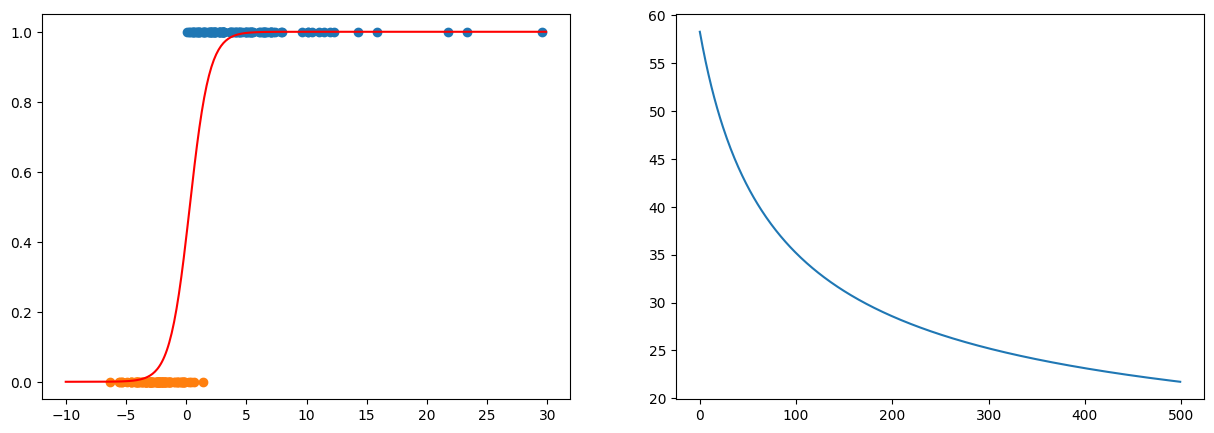

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

# plot the points
axs[0].scatter(X1_1, y1)
axs[0].scatter(X2_1, y2)

zz = np.arange(-10, 30, 0.1)

xx = np.stack((np.ones(len(zz)),
              zz), 
              axis = 1)


axs[0].plot(zz, sigmoid(np.dot(xx, w)), 'red')

# plot error
axs[1].plot(range(max_epochs), errors_epoch)

The difficult part of this model (and others) is that we have to decide properly if a point is in the first or the second class. If the threshold is $\overline{p} = 0.7$, what do we do if the probability of the point is exactly $0.7$ There is no right answer but we can try to decide better by adding another feature (making the problem bi-dimensional) and adding information to the problem.